In [2]:
from fastai.vision.all import *

In [3]:
path = Path("Plant_leave_diseases_dataset_without_augmentation")

In [4]:
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

c:\Users\Rakshitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [5]:
learn = cnn_learner(dls, xresnet50, metrics=accuracy)

c:\Users\Rakshitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [6]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.250951,0.112132,0.967175,2:49:26
1,0.159119,0.077613,0.974750,2:50:36
2,0.105109,0.051485,0.984579,2:49:27
3,0.066515,0.029948,0.992154,2:48:37
4,0.045983,0.026221,0.993146,2:49:32


In [7]:
interp = ClassificationInterpretation.from_learner(learn)

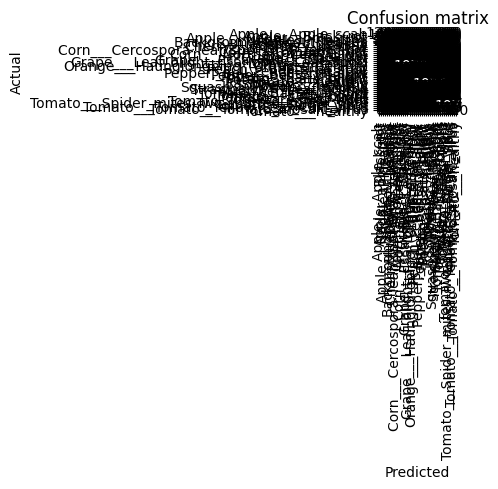

In [8]:
interp.plot_confusion_matrix()

In [9]:
print("Classification Report:")
print(interp.print_classification_report())

Classification Report:


c:\Users\Rakshitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


                                               precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      0.98      0.99       127
                            Apple___Black_rot       0.98      0.99      0.99       122
                     Apple___Cedar_apple_rust       1.00      1.00      1.00        53
                              Apple___healthy       1.00      0.99      1.00       317
                    Background_without_leaves       1.00      1.00      1.00       208
                          Blueberry___healthy       0.98      1.00      0.99       278
                      Cherry___Powdery_mildew       1.00      1.00      1.00       210
                             Cherry___healthy       0.99      0.99      0.99       177
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       114
                           Corn___Common_rust       1.00      1.00      1.00       238
                  Corn___Northern_Leaf_Bli

In [13]:
learn.export("../model/trainedmodel.pkl")

In [14]:
# Step 7: Loading the Model
loaded_model = load_learner("model/trainedmodel.pkl")

In [20]:
test_image_path = "Plant_leave_diseases_dataset_without_augmentation\Blueberry___healthy\image (1).JPG"
prediction, _, _ = loaded_model.predict(test_image_path)
print("Predicted Class:", prediction)


Predicted Class: Blueberry___healthy
